$\textbf{LIBRARIES}$

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("darkgrid")

Path data

In [20]:
path = "../Data/"

Quick look into data

In [21]:
df_states = pd.read_csv(path + 'stations_info.csv')
print(df_states.columns)

print('='*100)

print(df_states.head(2))

Index(['file_name', 'state', 'city', 'agency', 'station_location',
       'start_month', 'start_month_num', 'start_year'],
      dtype='object')
  file_name           state        city agency          station_location  \
0     AP001  Andhra Pradesh    Tirupati  APPCB       Tirumala, Tirupati    
1     AP002  Andhra Pradesh  Vijayawada  APPCB  PWD Grounds, Vijayawada    

  start_month  start_month_num  start_year  
0        July                7        2016  
1         May                5        2017  


I have a lot of data, so I'm going to choose only one state for analysis. 
I'm looking for the state that has the minimum number of agencies (since each agency can have different measurements or column names for the same feature, choosing one will be easier), the most data available, and a similar number of columns.

In [22]:
import os
import pandas as pd

# Initialize dictionaries to store the sum, maximum, and minimum number of columns for each prefix
sum_dict = dict()
max_dict = dict()
min_dict = dict()

# Iterate over each file in the specified directory path
for i in os.listdir(path):
    
    # Skip the file if it does not have a ".csv" extension
    if not i.endswith(".csv"):
        continue  # Corrected to 'continue' to properly skip to the next iteration

    # Extract the first two characters of the filename to use as a prefix
    prefix = i[:2]
    
    # Read the CSV file and count the number of columns in the first row
    val = pd.read_csv(path + i, nrows= 1).shape[1]

    # If the prefix is already in the dictionary, update the sum, max, and min values
    if prefix in sum_dict:
        sum_dict[prefix] += val  # Add the column count to the existing sum
        # Update the maximum columns count if the current file has more columns
        max_dict[prefix] = val if max_dict[prefix] < val else  max_dict[prefix]
        # Update the minimum columns count if the current file has fewer columns
        min_dict[prefix] = val if min_dict[prefix] > val else  min_dict[prefix]
    else:
        # If the prefix is not in the dictionary, initialize it with the current file's column count
        sum_dict[prefix] = val
        max_dict[prefix] = val
        min_dict[prefix] = val

# Create a DataFrame from the dictionaries to summarize the total, minimum, and maximum number of columns for each prefix
smm_df = pd.DataFrame({
    'sum': sum_dict.values(),  # Total number of columns for each prefix
    'min': min_dict.values(),  # Minimum number of columns for each prefix
    'max': max_dict.values()   # Maximum number of columns for each prefix
}, index=sum_dict.keys())

# Sort the DataFrame by the sum, min, and max columns for better visualization
smm_df = smm_df.sort_values(by=["sum", "min", "max"])

# Display the top 3 entries of the sorted DataFrame
smm_df.head(3)

,sum,min,max
st,8,8,8
HP,23,23,23
JK,23,23,23


In [23]:
#Number of diffrent agencies that measure air quility and how many .csv

# Select relevant columns: 'file_name', 'state', and 'agency' from df_states
df_states_sub = df_states[["file_name", "state", "agency"]]

# Extract the first two characters from 'file_name' to use as a prefix and replace 'file_name' with this prefix
df_states_sub["file_name"] = df_states_sub["file_name"].apply(lambda x: x[:2])

# Drop duplicate rows based on 'file_name', 'state', and 'agency' , then group by 'file_name' and 'state'
# Count the unique 'agency' entries in each group to determine the number of different agencies
df_states_sub_info = df_states_sub[["file_name", "state", "agency"]].drop_duplicates().groupby(["file_name", "state"]).count()

# Join the counts of unique 'agency' entries with the total count of CSV files for each state
df_states_sub_info = df_states_sub_info.join(
                pd.value_counts(df_states["state"]),
                on = "state"
            ).join(
                smm_df,
                on = "file_name"
            )

#Column rename
df_states_sub_info.columns = ['count_agency', 'count_csv', 'sum', 'min', 'max']

#Combining all created data
df_states_sub_info = df_states_sub_info.sort_values(['count_agency', 'count_csv', 'sum', 'min', 'max'], kind= 'heapsort')

# Print the subset of the DataFrame where there is only one agency measuring air quality ('count_agency' == 1)
print(df_states_sub_info[df_states_sub_info.count_agency == 1])

                             count_agency  count_csv  sum  min  max
file_name state                                                    
HP        Himachal Pradesh              1          1   23   23   23
JK        Jammu and Kashmir             1          1   23   23   23
MZ        Mizoram                       1          1   23   23   23
NL        Nagaland                      1          1   23   23   23
SK        Sikkim                        1          1   24   24   24
AR        Arunachal Pradesh             1          1   25   25   25
PY        Puducherry                    1          1   25   25   25
JH        Jharkhand                     1          2   29   10   19
TR        Tripura                       1          2   47   23   24
MN        Manipur                       1          2   48   24   24
ML        Meghalaya                     1          2   49   24   25
UK        Uttarakhand                   1          3   66   16   25
CH        Chandigarh                    1       

C:\Users\Wiktor_PC\AppData\Local\Temp\ipykernel_19384\4238118031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_sub["file_name"] = df_states_sub["file_name"].apply(lambda x: x[:2])


Looking at the output, I chose Andhra Pradesh state. The reason is that this state has 10 .csv files with 23 to 25 columns of data. Rajasthan state could work too, but my laptop wouldn't have been able to manage it.

In [24]:
try:
    df_states.drop(columns= ["agency", "station_location", "start_month"], inplace= True)
except:
    pass
print(df_states.head(2))

  file_name           state        city  start_month_num  start_year
0     AP001  Andhra Pradesh    Tirupati                7        2016
1     AP002  Andhra Pradesh  Vijayawada                5        2017


In [25]:
df_states[df_states['state'] == 'Andhra Pradesh'].city.unique()

array(['Tirupati', 'Vijayawada', 'Visakhapatnam', 'Rajamahendravaram',
       'Amaravati', 'Anantapur', 'Chittoor', 'Kadapa'], dtype=object)

I am working with a large dataset that is split into multiple files. First, I will create a function that will return a dataframe combining all datasheets' measurements in a given state, so we can see what data we're working with.

In [26]:
def combine_state_file(state_name: str):
    file_name_short = df_states_sub[df_states_sub["state"] == state_name]["file_name"]

    global path
    combined_df = list()

    print(f"Combining a total of {len(file_name_short)} files")

    file_name_short = file_name_short.iloc[0]

    for file in  os.listdir(path):
        if file_name_short in file:
            print(file)

            file_data = pd.read_csv(path + file)
            file_data["city"] = df_states[df_states["file_name"] == file[:-4]]["city"].values[0]
            file_data["city"] = file_data["city"].astype("string")

            combined_df.append(file_data)

    return pd.concat(combined_df)

In [27]:
state_name = 'Andhra Pradesh'
df = combine_state_file(state_name)
df.info()

Combining a total of 10 files
AP001.csv
AP002.csv
AP003.csv
AP004.csv
AP005.csv
AP006.csv
AP007.csv
AP008.csv
AP009.csv
AP010.csv
<class 'pandas.core.frame.DataFrame'>
Index: 272217 entries, 0 to 1592
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   From Date            272217 non-null  object 
 1   To Date              272217 non-null  object 
 2   PM2.5 (ug/m3)        215379 non-null  float64
 3   PM10 (ug/m3)         218510 non-null  float64
 4   NO (ug/m3)           220857 non-null  float64
 5   NO2 (ug/m3)          220797 non-null  float64
 6   NOx (ppb)            222419 non-null  float64
 7   NH3 (ug/m3)          216850 non-null  float64
 8   SO2 (ug/m3)          217459 non-null  float64
 9   CO (mg/m3)           219063 non-null  float64
 10  Ozone (ug/m3)        214914 non-null  float64
 11  Benzene (ug/m3)      221629 non-null  float64
 12  Toluene (ug/m3)      221602 non-null  float64
 

I have limited memory and processing power, so I clear memory before going further

In [28]:
l = %who_ls
exclude = ['df', 'np', 'os', 'pd', 'plt', 'sns', 'warnings' 'path', 'exclude', 'l']
for d in l:
    if d not in exclude:
        del globals()[d]

del l, exclude, d

In [29]:
%who_ls

['df', 'np', 'os', 'pd', 'plt', 'sns']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272217 entries, 0 to 1592
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   From Date            272217 non-null  object 
 1   To Date              272217 non-null  object 
 2   PM2.5 (ug/m3)        215379 non-null  float64
 3   PM10 (ug/m3)         218510 non-null  float64
 4   NO (ug/m3)           220857 non-null  float64
 5   NO2 (ug/m3)          220797 non-null  float64
 6   NOx (ppb)            222419 non-null  float64
 7   NH3 (ug/m3)          216850 non-null  float64
 8   SO2 (ug/m3)          217459 non-null  float64
 9   CO (mg/m3)           219063 non-null  float64
 10  Ozone (ug/m3)        214914 non-null  float64
 11  Benzene (ug/m3)      221629 non-null  float64
 12  Toluene (ug/m3)      221602 non-null  float64
 13  Temp (degree C)      166170 non-null  float64
 14  RH (%)               223812 non-null  float64
 15  WS (m/s)             220

As we can see dataframe includes 272217 rows of data with 28 featrures

$\textbf{DATA PRCESSING}$

Dataframe contains two features 'From Date' and 'To Date' that describe one hour windows. The same window is between rows, so I can drop 'To Date' column, because it same information. Since I'm working with time series it's common to use time as index. Let's create a function to make changes

In [31]:
def df_index_creation(df):
    df = df.drop(columns= "To Date")
    df["From Date"] = pd.to_datetime(df["From Date"])
    df = df.rename(columns= {"From Date": "datetime"})
    return df.set_index("datetime")

In [32]:
df = df_index_creation(df)
df.head(2)

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C),city,Eth-Benzene (ug/m3),MP-Xylene (ug/m3),O Xylene (ug/m3),VWS (degree),WD (degree)
datetime,,,,,,,,,,,,,,,,,,,,,
2016-07-01 10:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.6,0.48,14.5,1.0,...,-0.1,0.1,0.0,23.05,Tirupati,NaN,NaN,NaN,NaN,NaN
2016-07-01 11:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,15.0,0.7,...,-0.1,0.1,0.0,NaN,Tirupati,NaN,NaN,NaN,NaN,NaN


Since I am working with a large dataset, where each file can contain different names for metrics, it will be necessary to reduce some columns by merging potentially similar ones. 

In [45]:
# List of air quality parameters to search for in the DataFrame columns
parameters = [
    'PM10', 'PM2.5', 'CO', 'CO2', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Temp', 'AT', 'BP', 'Benzene',
    'CH4', 'Eth-Benzene', 'Gust', 'HCHO', 'Hg', 'MH', 'MP-Xylene', 'NMHC', 'O Xylene', 'Ozone',
    'Power', 'RF', 'RH', 'SPM', 'SR', 'THC', 'Toluene', 'VWS', 'Variance', 'WD', 'WS', 'Xylene'
]

# Dictionary to store similar column names grouped by the air quality parameter
similar_names = dict()

# Convert DataFrame columns to a list for easier iteration
df_column_names = df.columns.to_list()

# Iterate over each parameter to find matching column names
for p in parameters:
    for name in df_column_names:
        # Check if the parameter is not already in the similar_names dictionary
        if p not in similar_names:
            # If the parameter is found in the column name, initialize the list with the column name
            if p in name:
                similar_names[p] = [name]
        else:
            # If the parameter is already in the dictionary and found in the column name, append to the list
            if p in name:
                similar_names[p].append(name)

# Print the grouped column names for each parameter
for p in similar_names.keys():
    print(f'Key {p}: {similar_names[p]}')

Key PM10: ['PM10 (ug/m3)']
Key PM2.5: ['PM2.5 (ug/m3)']
Key CO: ['CO (mg/m3)']
Key NO: ['NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)']
Key NO2: ['NO2 (ug/m3)']
Key NOx: ['NOx (ppb)']
Key NH3: ['NH3 (ug/m3)']
Key SO2: ['SO2 (ug/m3)']
Key Temp: ['Temp (degree C)']
Key AT: ['AT (degree C)']
Key BP: ['BP (mmHg)']
Key Benzene: ['Benzene (ug/m3)', 'Eth-Benzene (ug/m3)']
Key Eth-Benzene: ['Eth-Benzene (ug/m3)']
Key Hg: ['BP (mmHg)']
Key MP-Xylene: ['MP-Xylene (ug/m3)']
Key O Xylene: ['O Xylene (ug/m3)']
Key Ozone: ['Ozone (ug/m3)']
Key RF: ['RF (mm)']
Key RH: ['RH (%)']
Key SR: ['SR (W/mt2)']
Key Toluene: ['Toluene (ug/m3)']
Key VWS: ['VWS (m/s)', 'VWS (degree)']
Key WD: ['WD (deg)', 'WD (degree)']
Key WS: ['WS (m/s)', 'VWS (m/s)', 'VWS (degree)']
Key Xylene: ['Xylene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)']


So after a simple substring search, I found two features that have different units. Now, let's check how they look.

In [34]:
truly_similar_names = {
'VWS': ['VWS (m/s)', 'VWS (degree)'],
'WD': ['WD (deg)', 'WD (degree)']
}

In [36]:
def plot_features_similarities_lineplot(df: pd.DataFrame, similar_feature: list):
    """
    Plots line plots for specified features across different years.
    
    Each year is plotted on a separate subplot. The function groups the data by the day of the year
    and computes the average value of each feature for each day.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with a DateTime index.
    similar_features (list): A list of column names (features) to be analyzed and plotted.
    """

    # Extract unique years from the DataFrame's index
    years = df.index.year.unique().to_list()
    
    # Determine the number of rows and columns for subplots
    ncol = 2  # Number of columns for subplots
    nrow = int(len(years) /ncol //1) # Calculate number of rows required, rounding up
    
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrow, ncol, figsize=(13, 6*nrow))
    axes = np.atleast_1d(axes).flatten()
    
    for i, y in enumerate(years):
        # Filter the DataFrame for the current year and selected features
        df_feature = df[df.index.year == y][similar_feature]

        # Add a column for the day of the year to enable grouping
        df_feature['dayofyear'] = df_feature.index.dayofyear
        
        # Group the data by 'dayofyear' and compute the mean value for each feature
        df_year_grouped = df_feature.groupby('dayofyear').mean(numeric_only=True)
        
        # Plot each feature as a line in the current subplot
        for feature in similar_feature:
            sns.lineplot(x=df_year_grouped.index, y=df_year_grouped[feature], ax=axes[i], label=feature)
        
        
        # Set titles and labels for the subplot
        axes[i].set_title(f'Year: {y}')
        axes[i].set_xlabel('Day')
        axes[i].set_ylabel('Value')
        axes[i].legend()

    plt.plot()


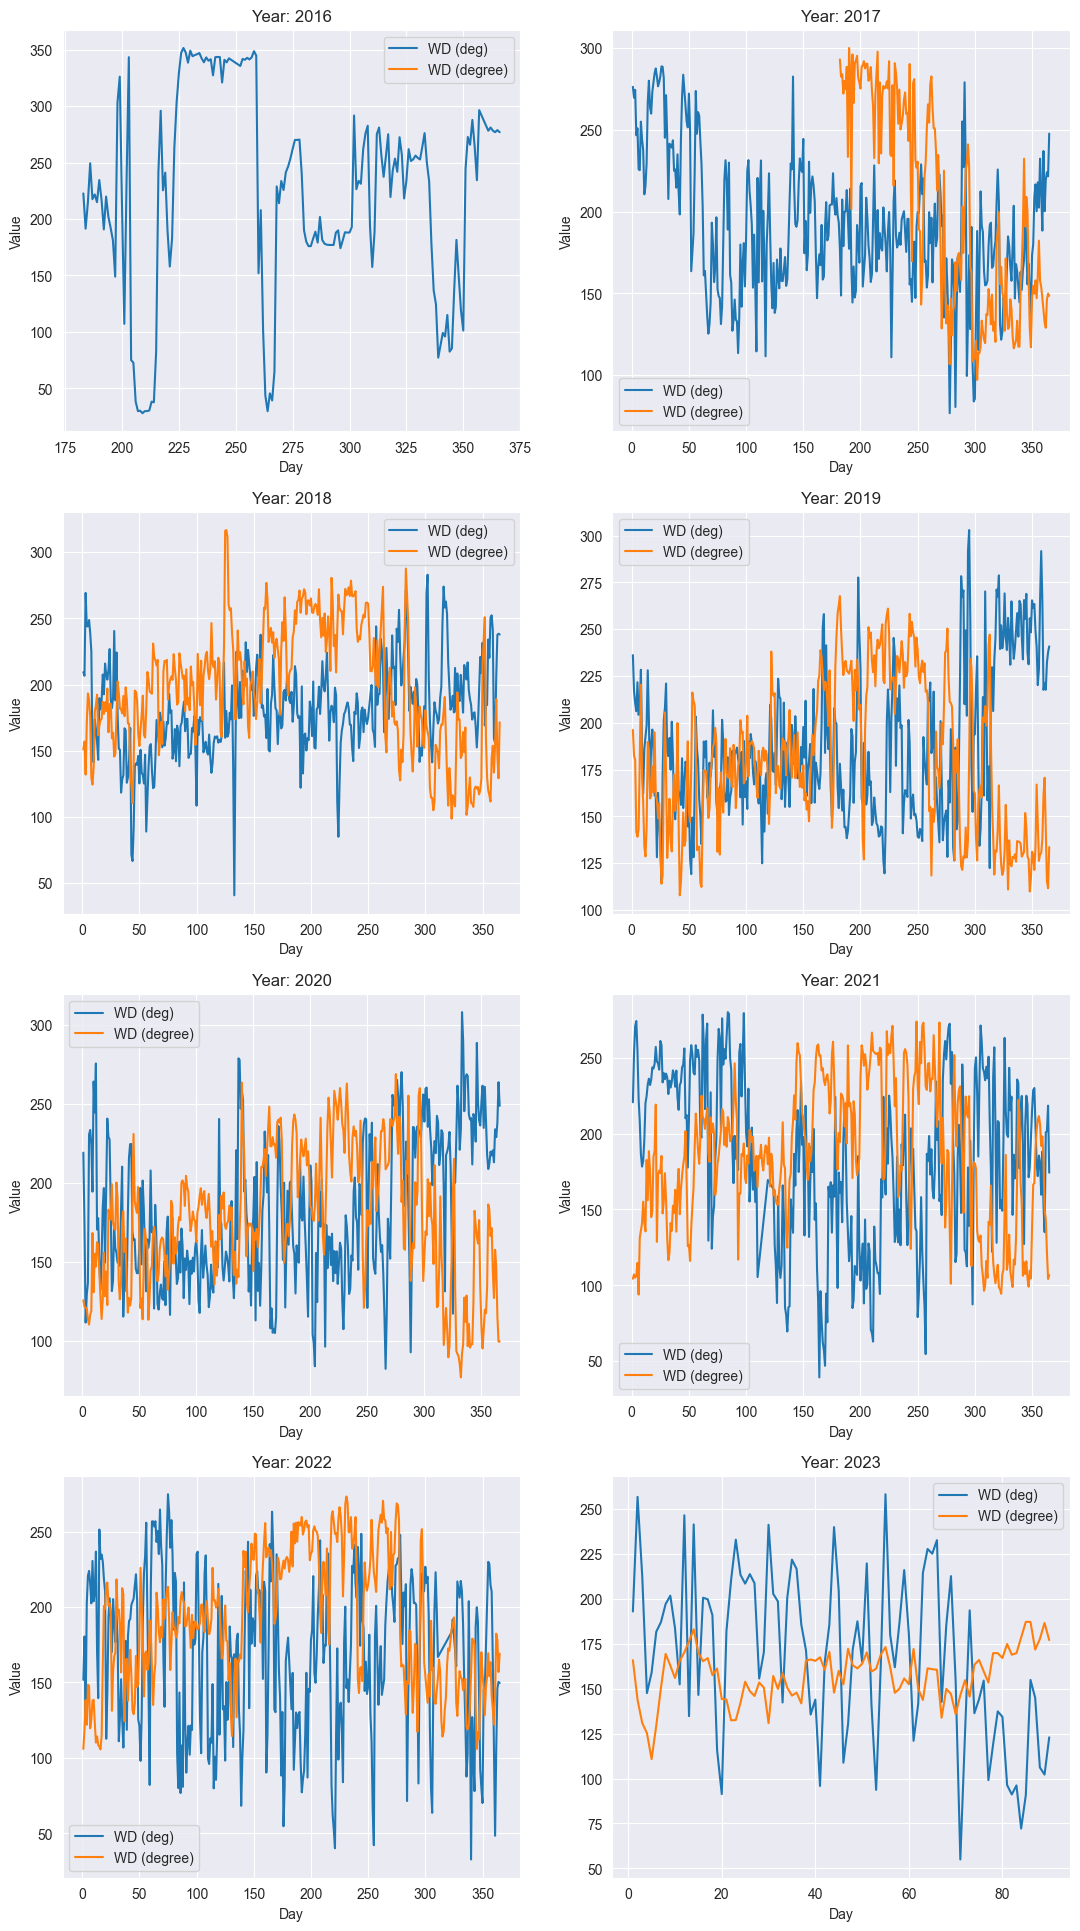

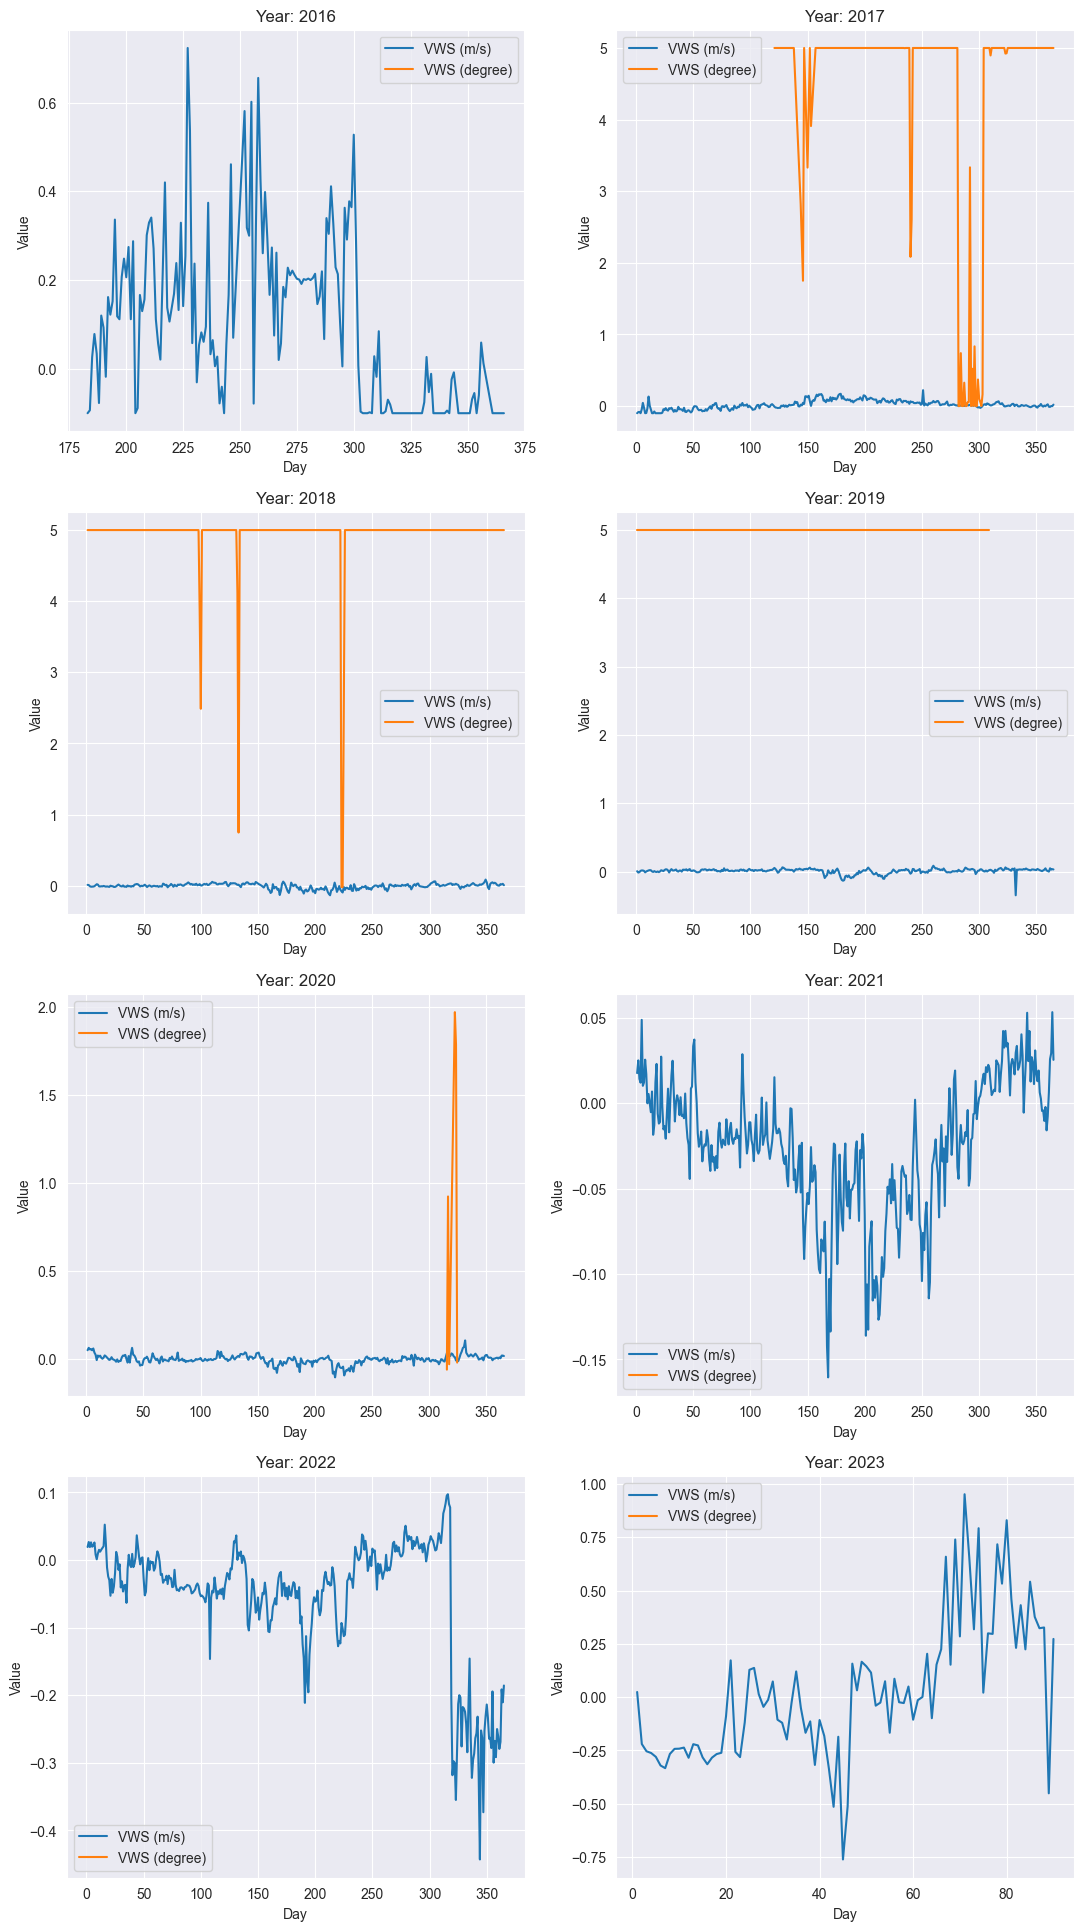

In [54]:
plot_features_similarities_lineplot(df, truly_similar_names['WD'])
plot_features_similarities_lineplot(df, truly_similar_names['VWS'])


In [49]:
def plot_features_similarities_histogram(df: pd.DataFrame, similar_feature: list):
    """
    Plots histograms for specified features across different years.
    
    Each year is plotted on a separate subplot. The function groups the data by the day of the year
    and computes the average value of each feature for each day, then plots the histograms of these averages.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with a DateTime index.
    similar_features (list): A list of column names (features) to be analyzed and plotted.
    """

    # Extract unique years from the DataFrame's index
    years = df.index.year.unique().to_list()
    
    ncol = 2
    nrow = int(len(years) /ncol //1)
    
    fig, axes = plt.subplots(nrow, ncol, figsize=(13, 6*nrow))
    axes = np.atleast_1d(axes).flatten()
    
    for i, y in enumerate(years):
        df_feature = df[df.index.year == y][similar_feature]
        df_feature = df_feature.groupby([df_feature.index.dayofyear]).mean(numeric_only=True)

        for feature in similar_feature:
            sns.histplot(df_feature[feature], kde=False, ax=axes[i], label=feature)
        
            
        axes[i].set_title(f'Year: {y}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

    plt.plot()



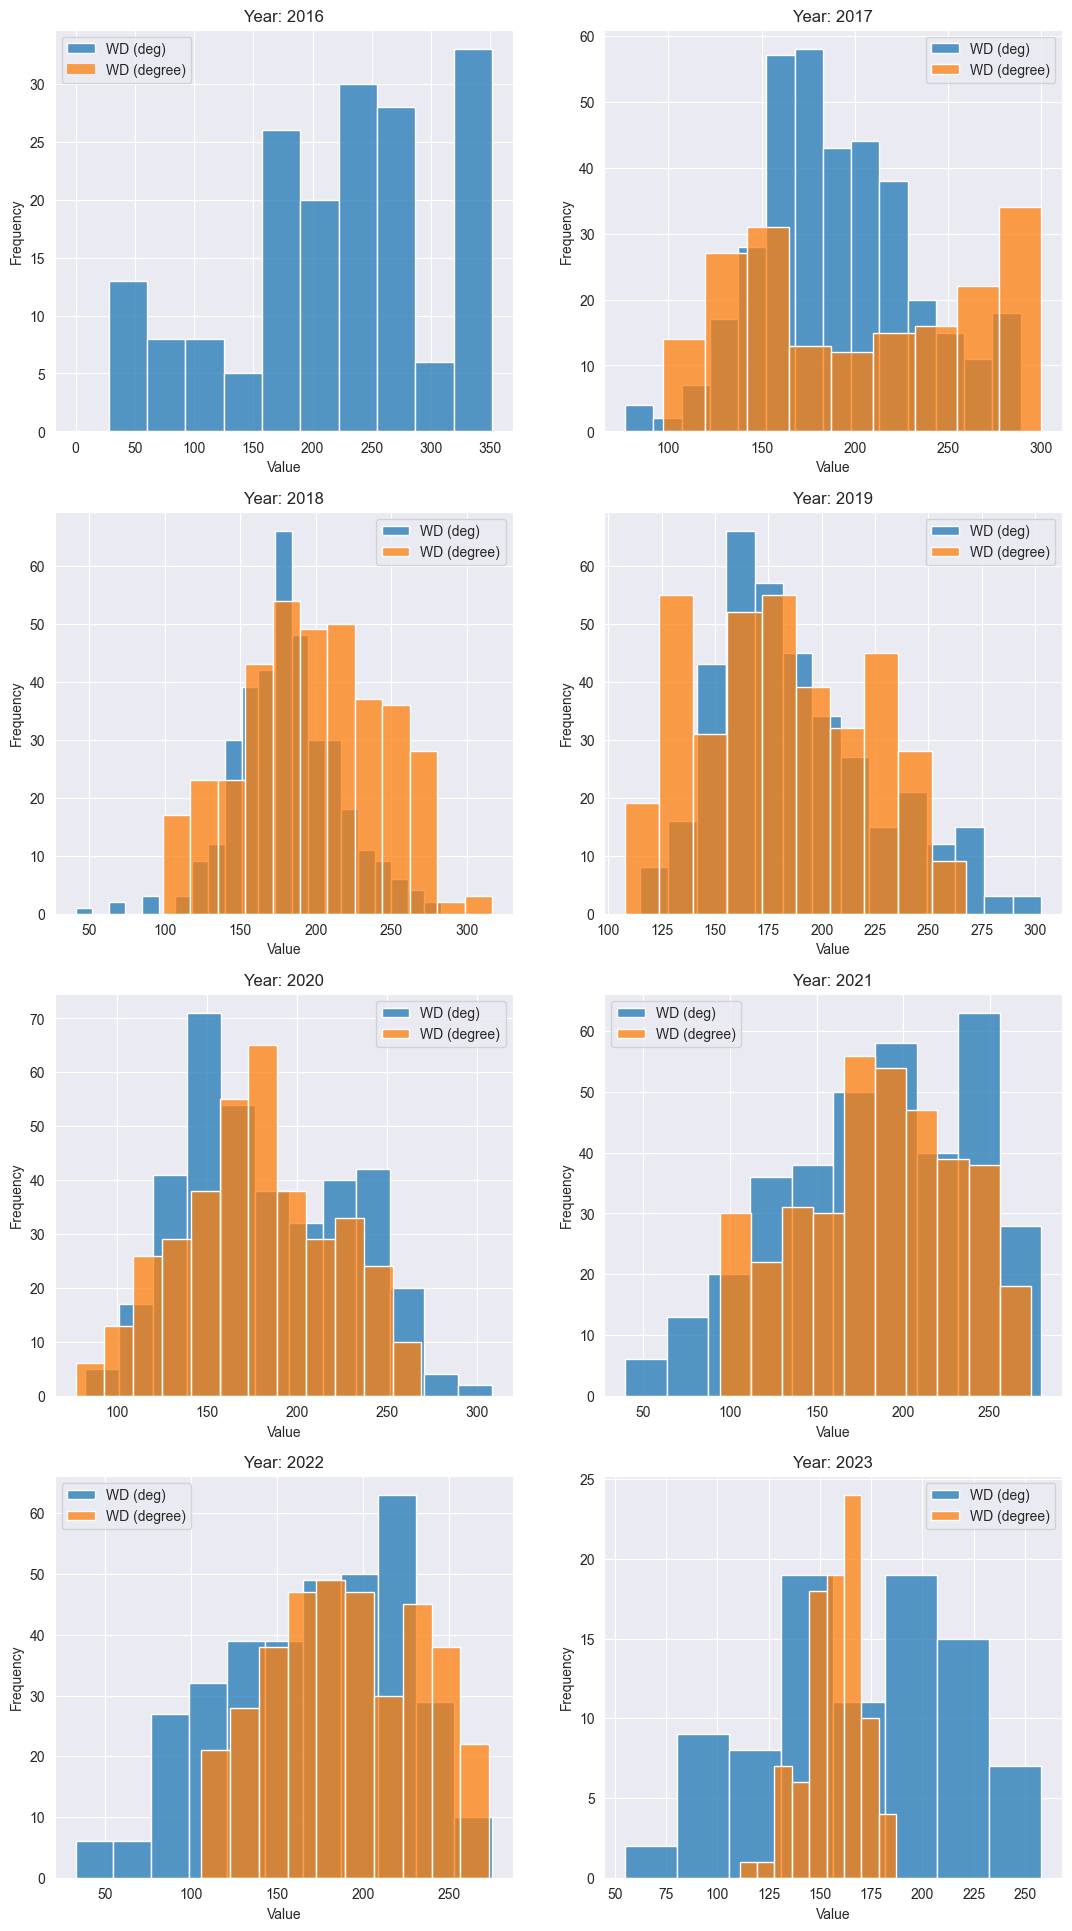

In [50]:
plot_features_similarities_histogram(df, truly_similar_names['WD'])

In [62]:
def lack_of_info_in_rows(df: pd.DataFrame, category: list, list_name = ""):

    tf = df[category].isnull().sum(axis= 1).value_counts()
    length = tf.sum()
    more_than_two = tf[tf.keys() > 1].sum()
    
    print(f"Lack of data in {len(category)} row{"s" if len(category) > 1 else ""}{" for " + list_name if list_name else ""}: {more_than_two / length * 100:0.2f}%")

    for i in category:
        print(f"Missing data in {i}: {(1 - df[i].isnull().sum()/len(df[i]))*100:.2f}%")

    print()


In [63]:
df[[_ for item in truly_similar_names.values() for _ in item]].describe().applymap(lambda x: f"{x:0.3f}").T

,count,mean,std,min,25%,50%,75%,max
VWS (m/s),206891.000,-0.010,0.690,-19.460,-0.050,0.000,0.040,19.680
VWS (degree),18159.000,4.824,0.917,-0.060,5.000,5.000,5.000,5.000
WD (deg),71726.000,184.421,78.057,0.200,130.750,183.100,239.000,360.000
WD (degree),149512.000,182.865,72.489,2.610,120.000,180.670,246.750,360.000


In [64]:
lack_of_info_in_rows(df, truly_similar_names['WD'], list_name = "WD")
lack_of_info_in_rows(df, truly_similar_names['VWS'], list_name = "VWS")

Lack of data in 2 rows for WD: 18.73%
Missing data in WD (deg): 26.35%
Missing data in WD (degree): 54.92%

Lack of data in 2 rows for VWS: 17.33%
Missing data in VWS (m/s): 76.00%
Missing data in VWS (degree): 6.67%



Let's see if can I correlate them

In [65]:
df.loc[:, truly_similar_names['WD']].dropna(how= 'any').count()

WD (deg)       0
WD (degree)    0
dtype: int64

By examining the histogram, dataframe.describe(), and line plot, I observed that the WD features are similar across most years. The differences seem to arise mainly due to missing data, not like VWS. 

The WD features have different names but measure the same data in the same unit. Their distributions appear similar, so I decided to merge them. Initially, I attempted to find a correlation between them to create a filling function using linear regression. However, I couldn't find any rows where the values appeared twice. My first idea was to use linear regression because most of the data is rescaled.

For the VWS features, they seem to include both categorical and numerical data types, which makes it impossible to merge them directly. Therefore, I chose the feature with fewer missing values (VWS (degree)) and drop 'VWS (m/s)'.

In [43]:
change_n_marge_feature = {
 'PM10': ['PM10 (ug/m3)'],
 'PM2.5': ['PM2.5 (ug/m3)'],
 'CO': ['CO (mg/m3)'],
 'NO': ['NO (ug/m3)'],
 'NO2': ['NO2 (ug/m3)'],
 'NOx': ['NOx (ppb)'],
 'NH3': ['NH3 (ug/m3)'],
 'SO2': ['SO2 (ug/m3)'],
 'Temp': ['Temp (degree C)'],
 'AT': ['AT (degree C)'],
 'BP': ['BP (mmHg)'],
 'Benzene': ['Benzene (ug/m3)'],
 'Eth-Benzene': ['Eth-Benzene (ug/m3)'],
 'MP-Xylene': ['MP-Xylene (ug/m3)'],
 'O Xylene': ['O Xylene (ug/m3)'],
 'Ozone': ['Ozone (ug/m3)'],
 'RF': ['RF (mm)'],
 'RH': ['RH (%)'],
 'SR': ['SR (W/mt2)'],
 'Toluene': ['Toluene (ug/m3)'],
 'VWS': ['VWS (m/s)'],
 'WD': ['WD (deg)', 'WD (degree)'],
 'WS': ['WS (m/s)'],
 'Xylene': ['Xylene (ug/m3)']}

drop_features = ['VWS (m/s)']

In [44]:
def marge_features(df: pd.DataFrame, features_to_marge: dict, feature_to_drop: list):
    df.drop(feature_to_drop, axis = 1, inplace= True)

$\textbf{Exploratory Data Analysis (EDA)}$